# Ciência dos Dados - PROJETO 1

## Pedro Oliveira de Azambuja

## A Classe social determina se o indivíduo tem acesso a Internet?

## Introdução

Nesse projeto analisarei, restringindo-me aos Estados de São Paulo e Rio de Janeiro, se a classe social de um indivíduo ainda é ou se está deixando de ser um fator que determina se ele possui acesso a Internet ou não.

Para responder a essa pergunta, farei uso de comparacões entre a frequência de acesso a Internet pelas classes sociais e análises da renda.

-Fontes:

http://g1.globo.com/economia/seu-dinheiro/noticia/2013/08/veja-diferencas-entre-conceitos-que-definem-classes-sociais-no-brasil.html

http://g1.globo.com/jornal-nacional/noticia/2011/06/lancado-programa-para-baratear-o-acesso-internet-de-banda-larga.html

In [72]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [73]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/pedroazambuja/Ciencia dos Dados


# PNAD DE 2013

In [74]:
DOM2013 = pd.read_csv('DOM2013.csv',sep=',')
dados2013 = DOM2013.loc[:,["UF","V02322","V4621"]]

#Filtrando para os Estados de SP e RJ
dados2013 = dados2013[(dados2013.UF == 35)|(dados2013.UF == 33)]


#Mudando a categoria das variáveis
dados2013.V02322 = dados2013.V02322.astype("category")
dados2013.UF = dados2013.UF.astype("category")


#Rotulando os valores
dados2013.V02322.cat.categories = (['sim', 'não'])
dados2013.UF.cat.categories =("RJ","SP")


#Rotulando as colunas
dados2013 = dados2013.rename(columns={"V02322":"acesso_a_Internet"})
dados2013 = dados2013.rename(columns={"V4621":"Renda_per_capita"})


#Filtrando os valores não declarados de Renda
dados2013=dados2013[dados2013["Renda_per_capita"]!= 999999999999.0]

#Filtrando Valores nulos
dados2013 = dados2013[pd.notnull(dados2013.acesso_a_Internet)&pd.notnull(dados2013.Renda_per_capita)]

#Salvando para um documento csv
dados2013.to_csv("resumo.csv")



# PNAD DE 2014

In [75]:
#OBJ: Analisar como cresceu relativamente o acesso a Internet entre as classes sociais em 2013,2014,2015
#Obj1 : Analisar a discrepância do acesso a internet entre as faixas de riqueza
#Obj2 : Se crescimentos de renda são acompanhados de crescimentos no acesso a Internet

DOM2014 = pd.read_csv('DOM2014.csv',sep=',')
dados2014 = DOM2014.loc[:,["UF","V02322","V4621"]]

#Filtrando para os Estados de SP e RJ
dados2014 = dados2014[(dados2014.UF == 35)|(dados2014.UF == 33)]


#Mudando a categoria das variáveis
dados2014.V02322 = dados2014.V02322.astype("category")
dados2014.UF = dados2014.UF.astype("category")

#Rotulando os valores
dados2014.V02322.cat.categories = (['sim', 'não'])
dados2014.UF.cat.categories =("RJ","SP")


#Rotulando as colunas
dados2014 = dados2014.rename(columns={"V02322":"acesso_a_Internet"})
dados2014 = dados2014.rename(columns={"V4621":"Renda_per_capita"})


#Filtrando os valores não declarados de Renda
dados2014=dados2014[dados2014["Renda_per_capita"]!= 999999999999.0]

#Filtrando Valores nulos
dados2014 = dados2014[pd.notnull(dados2014.acesso_a_Internet)&pd.notnull(dados2014.Renda_per_capita)]

#Salvando para um documento csv
dados2014.to_csv("resumo2.csv")

# PNAD 2015

In [76]:
DOM2015 = pd.read_csv('DOM2015.csv',sep=',')
dados2015 = DOM2015.loc[:,["UF","V02322","V4621"]]

#Filtrando para os Estados de SP e RJ
dados2015 = dados2015[(dados2015.UF == 35)|(dados2015.UF == 33)]


#Mudando a categoria das variáveis
dados2015.V02322 = dados2015.V02322.astype("category")
dados2015.UF = dados2015.UF.astype("category")

#Rotulando os valores
dados2015.V02322.cat.categories = (['sim', 'não'])
dados2015.UF.cat.categories =("RJ","SP")


#Rotulando as colunas
dados2015 = dados2015.rename(columns={"V02322":"acesso_a_Internet"})
dados2015 = dados2015.rename(columns={"V4621":"Renda_per_capita"})


#Filtrando os valores não declarados de Renda
dados2015=dados2015[dados2015["Renda_per_capita"]!= 999999999999.0]

#Filtrando Valores nulos
dados2015 = dados2015[pd.notnull(dados2015.acesso_a_Internet)&pd.notnull(dados2015.Renda_per_capita)]

#Salvando para um documentos csv
dados2015.to_csv("resumo3.csv")


# Classificação da Renda em faixas sociais

In [80]:
#Valores das classes sociais(de acordo com o site G1)
baixa = 441
media = 1019
alta = 2480

#2013
dados2013.loc[dados2013.Renda_per_capita < baixa, "Classe"] = "baixa"
dados2013.loc[(dados2013.Renda_per_capita > baixa)&(dados2013.Renda_per_capita<media), "Classe"] = "média baixa"
dados2013.loc[(dados2013.Renda_per_capita > media)&(dados2013.Renda_per_capita<alta),'Classe'] = 'média'
dados2013.loc[dados2013.Renda_per_capita > alta, "Classe"] = "alta"

#2014
dados2014.loc[dados2014.Renda_per_capita < baixa, "Classe"] = "baixa"
dados2014.loc[(dados2014.Renda_per_capita > baixa)&(dados2014.Renda_per_capita<media), "Classe"] = "média baixa"
dados2014.loc[(dados2014.Renda_per_capita > media)&(dados2014.Renda_per_capita<alta),'Classe'] = 'média'
dados2014.loc[dados2014.Renda_per_capita > alta, "Classe"] = "alta"

#2015
dados2015.loc[dados2015.Renda_per_capita < baixa, "Classe"] = "baixa"
dados2015.loc[(dados2015.Renda_per_capita > baixa)&(dados2015.Renda_per_capita<media), "Classe"] = "média baixa"
dados2015.loc[(dados2015.Renda_per_capita > media)&(dados2014.Renda_per_capita<alta),'Classe'] = 'média'
dados2015.loc[dados2015.Renda_per_capita > alta, "Classe"] = "alta"




# Graficos de frequência relativa

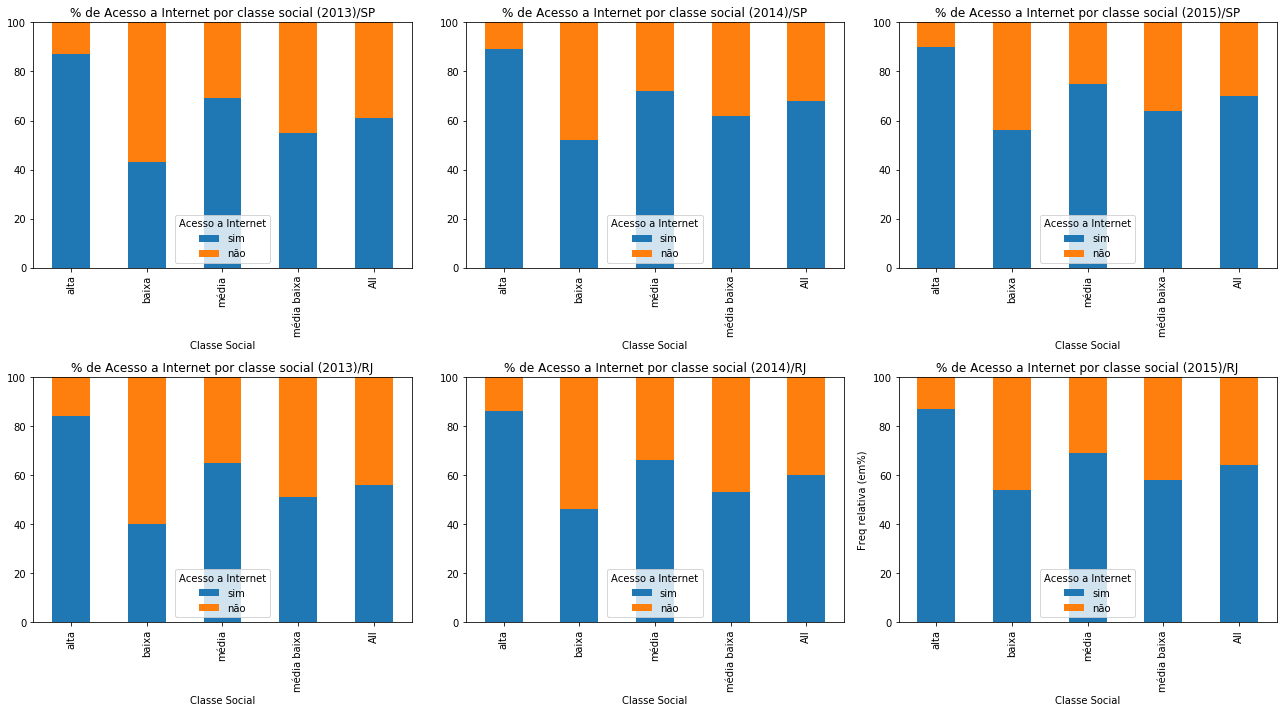

In [78]:
#funcao que converte em porcentagem
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)


fig,axes = plt.subplots(nrows = 2, ncols = 3)
#########2013
#crosstab acesso a internet e classe social
#SP
ct = pd.crosstab(dados2013[dados2013.UF == 'SP'].Classe,dados2013[dados2013.UF == 'SP'].\
                 acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet']).apply(percConvert, axis = 1)
ct = ct.iloc[:,:-1]


plot = ct.plot(kind="bar",ax = axes[0,0],figsize=(18,10),stacked = True);axes[0,0].set_title("% de Acesso a Internet por classe social (2013)/SP")
#;axes[0,0].set_title("titulo")
plot.set_ylim([0,100])
#plt.ylabel("Freq relativa (em%)")


#RJ

ct = pd.crosstab(dados2013[dados2013.UF == 'RJ'].Classe,dados2013[dados2013.UF == 'RJ'].acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet']).apply\
(percConvert, axis = 1)
ct = ct.iloc[:,:-1]

plot = ct.plot(kind="bar",ax = axes[1,0],figsize = (18,10),stacked = True);axes[1,0].set_title("% de Acesso a Internet por classe social (2013)/RJ")
plot.set_ylim([0,100])
plt.ylabel("Freq relativa (em%)")



#########2014
#crosstab acesso a internet e classe social
#SP
ct = pd.crosstab(dados2014[dados2014.UF == 'SP'].Classe,dados2014[dados2014.UF == 'SP'].acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet']).apply\
(percConvert, axis = 1)
ct = ct.iloc[:,:-1]


plot = ct.plot(kind="bar",ax = axes[0,1],figsize=(18,10),stacked = True);axes[0,1].set_title('% de Acesso a Internet por classe social (2014)/SP')
plot.set_ylim([0,100])
plt.ylabel("Freq relativa (em%)")


#RJ
ct = pd.crosstab(dados2014[dados2014.UF == 'RJ'].Classe,dados2014[dados2014.UF =='RJ'].acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet']).apply\
(percConvert, axis = 1)
ct = ct.iloc[:,:-1]

plot = ct.plot(kind="bar",ax = axes[1,1],figsize=(18,10),stacked = True);axes[1,1].set_title('% de Acesso a Internet por classe social (2014)/RJ')
plot.set_ylim([0,100])
plt.ylabel("Freq relativa (em%)")


#########2015
#crosstab acesso a internet e classe social
#SP
ct = pd.crosstab(dados2015[dados2015.UF == 'SP'].Classe,dados2015[dados2015.UF == 'SP'].acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet']).apply\
(percConvert, axis = 1)
ct = ct.iloc[:,:-1]

plot = ct.plot(kind="bar",ax = axes[0,2],figsize = (18,10),stacked = True);axes[0,2].set_title('% de Acesso a Internet por classe social (2015)/SP')
plot.set_ylim([0,100])



#RJ
ct = pd.crosstab(dados2015[dados2015.UF == 'RJ'].Classe,dados2015[dados2015.UF == 'RJ'].acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet']).apply\
(percConvert, axis = 1)
ct = ct.iloc[:,:-1]

plot = ct.plot(kind="bar",ax = axes[1,2],figsize = (18,10),stacked = True);axes[1,2].set_title('% de Acesso a Internet por classe social (2015)/RJ')
plot.set_ylim([0,100])



plt.tight_layout()
plt.show()

## Análise

Com esses Gráficos é possível notar que houve um crescimento geral nas frequências de acesso a Internet, principalmente na classe média baixa.
Caso essa tendência se mantenha nos próximos anos, é possível inferir que a frequência de acesso de todas as classes se aproxime de 100%.

Tendo isso em vista, surge outra pergunta: O crescimento observado é consequência do aumento geral da renda ou a Internet está se tornando um fator essencial a todas as classes? 


# A frequencia aumentou, mas foi devido ao aumento médio do poder de compra ou facilidade ao acesso a internet?


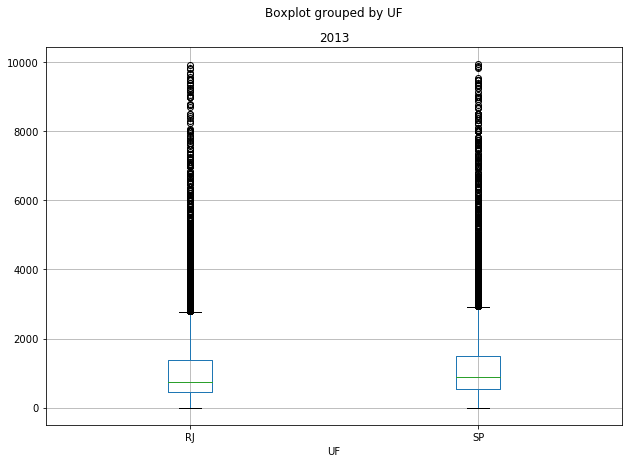

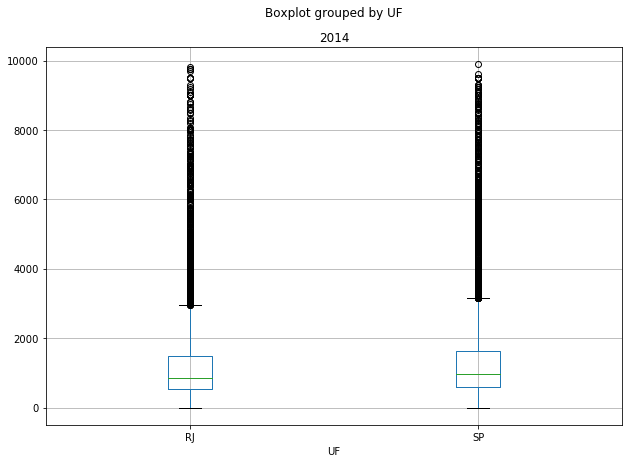

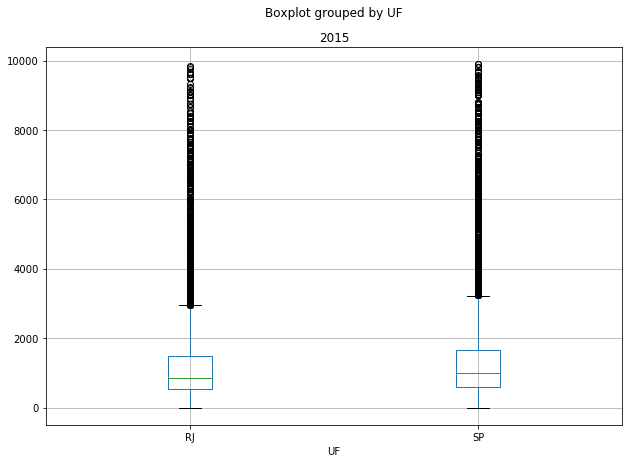

In [79]:


df2013 = dados2013[dados2013.Renda_per_capita<10000]
df2013.boxplot(column ="Renda_per_capita", by = 'UF',figsize=(10,7))
plt.title('2013')


df2014 = dados2014[dados2014.Renda_per_capita<10000]
df2014.boxplot(column ="Renda_per_capita", by = 'UF',figsize=(10,7))
plt.title('2014')


df2015 = dados2015[dados2015.Renda_per_capita<10000]
df2015.boxplot(column ="Renda_per_capita", by = 'UF',figsize=(10,7))
plt.title('2015')




## Análise

Analisando esses boxplots percebe-se que a distribuição da renda nos Estados de SP e RJ se manteve muito parecida ao longo dos três anos.

# Conclusão

A partir dos dados obtidos, pode-se inferir que o acesso à Internet está se tornando um importante elemento cultural das sociedades do Rio de Janeiro e São Paulo, uma vez que, mesmo sem significativos crescimentos de renda de suas populações, ou barateamento do preço da Internet( que desde 2011 está fixo em R$ 35,00 o plano mais barato devido a um programa governamental ), o número de pessoas com acesso somente cresceu ao longo dos anos de 2013,2014 e 2015.